# Basic Numerical Methods


## 1. Least Squares Method and Regression Analysis



### a. Least Squares Method

The least squares method minimizes the sum of squared differences between observed and predicted values. It's used to find the best-fitting line in regression analysis.

Mathematically:
$$
	{Error} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$
Where:
$$
(y_i) = actual value
$$
$$
(\hat{y}_i) = predicted value$$
$$
    


### b. Simple Linear Regression Example

Goal of Linear Regression:

We want to find the best-fitting line: \( y = mx + b \)

Design Matrix A:
 [[1. 1.]
 [2. 1.]
 [3. 1.]
 [4. 1.]
 [5. 1.]]
Slope (m): 0.7499999999999999
Intercept (b): 1.3900000000000006
Residuals: [0.027]
Rank of matrix A: 2
Singular values of A: [7.69121313 0.91936964]


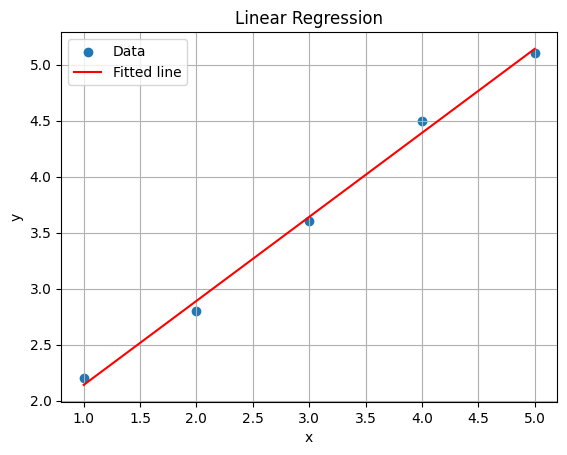

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Design matrix construction based on data points
x = np.array([1, 2, 3, 4, 5])
y = np.array([2.2,2.8,3.6,4.5,5.1])

# Step 2: Build matrix A: Each row represents the linear model y=mx+c.
# A = np.vstack([x, np.ones(len(x))]).T # Stack x and a column of ones and then transpose it
A = np.c_[x, np.ones(len(x))] # This is how I wouldve made it
print ("Design Matrix A:\n", A) # The first column is the value of x. The second column is always 1, which allows us to solve for the intercept c.

# Step 3: Fit line using least squares- it solves for the slope m and intercept c of the best-fit line
# np.linalg.lstsq returns a tuple (coeffs, residuals, rank, s), so unpack accordingly.
# x, residuals, rank, s = np.linalg.lstsq(A, y, rcond=None)
coeffs, residuals, rank, s = np.linalg.lstsq(A, y, rcond=None)
# first object is an array of 2, coeffs = [0, 1]
m = coeffs[0] # assigns first obj of tuple into m, where m = slope
b = coeffs[1] # assigns second obj of tuple into b, where b = y-int

# Step 4: Output the results and plot them
print("Slope (m):", m)
print("Intercept (b):", b)
print("Residuals:", residuals)
print("Rank of matrix A:", rank)
print("Singular values of A:", s) 

plt.scatter(x, y, label='Data')
plt.plot(x, m*x + b, 'r', label='Fitted line')
plt.legend()
plt.title('Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


#### Exercise- Make up a set of data and find their best fit using least squares linear regression.

Points are: (1, 3.1), (2, 4.0), (3, 6.2), (4, 7.9), (5, 9.1
Slope: 1.5899999999999996
Y-intercept: 1.2899999999999996
Residuals: [0.371]
Rank: 2
Values of A: [7.69121313 0.91936964]


Text(0, 0.5, 'Whyy')

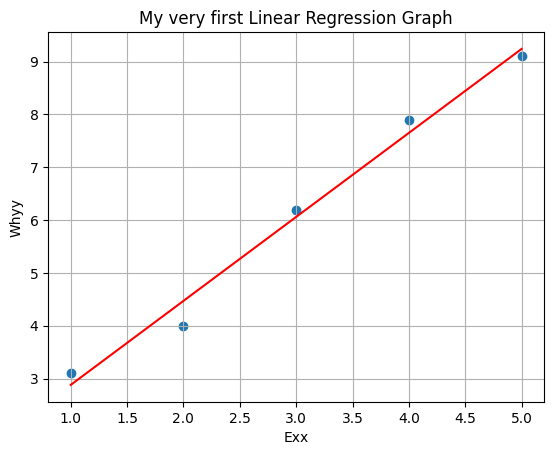

In [20]:
import numpy as np
import matplotlib.pyplot as plt
# Your code here
print("Points are: (1, 3.1), (2, 4.0), (3, 6.2), (4, 7.9), (5, 9.1")

x = np.array([1, 2, 3, 4, 5])
y = np.array([3.1, 4.0, 6.2, 7.9, 9.1])

# Create matrix of y = mx + b
A = np.c_[x, np.ones(len(x))]

# Solve using least squares method
hello, residuals, rank, s = np.linalg.lstsq(A, y, rcond=None)
m = hello[0]
b = hello[1]

# Print results and plot them
print(f"Slope:", m)
print(f"Y-intercept:", b)
print(f"Residuals:", residuals)
print(f"Rank:", rank)
print(f"Values of A:", s)

plt.scatter(x, y)
plt.plot(x, m*x + b, "r")
plt.grid()
plt.title("My very first Linear Regression Graph")
plt.xlabel("Exx")
plt.ylabel("Whyy")


## 2. Root Finding Methods in Numerical Analysis

This notebook demonstrates two popular numerical methods for finding roots of equations:

1. **Bisection Method**
2. **Newton-Raphson Method**

We will use the function:
\[ f(x) = x^3 - 2x - 5 \]



### a. Bisection Method

The Bisection Method is a simple and robust technique for finding roots of a continuous function. It works by repeatedly halving an interval and selecting the subinterval in which the function changes sign.

#### Algorithm Steps:
1. Define the function f(x)
2. Choose interval [a, b] where f(a) * f(b) < 0
3. Repeat until convergence:
   - Compute midpoint c = (a + b)/2
   - Evaluate f(c)
   - If f(c) * f(a) < 0, set b = c
   - Else, set a = c
   - Stop when |f(c)| is small enough


In [30]:
# Complete the Bisection Method implementation
def f(x):
    return x**3 - 2*x - 5
# Interval
a = 2
b = 3
print(f"Interval:", [a, b])

for i in range(50):
# Midpoint
    c = (a + b)/2
    print(f"Midpoint:", c)
    print(f"f(c):", f(c))

    if f(c) * f(a) < 0:
        b = c
    else:
        a = c

    if abs(f(c)) < 1e-6:
        print("Root Found!")
        break

# print("Root found using Bisection Method:", root_bisection)
# Your code to plot the function and the root found


Interval: [2, 3]
Midpoint: 2.5
f(c): 5.625
Midpoint: 2.25
f(c): 1.890625
Midpoint: 2.125
f(c): 0.345703125
Midpoint: 2.0625
f(c): -0.351318359375
Midpoint: 2.09375
f(c): -0.008941650390625
Midpoint: 2.109375
f(c): 0.16683578491210938
Midpoint: 2.1015625
f(c): 0.07856225967407227
Midpoint: 2.09765625
f(c): 0.03471428155899048
Midpoint: 2.095703125
f(c): 0.012862332165241241
Midpoint: 2.0947265625
f(c): 0.00195434782654047
Midpoint: 2.09423828125
f(c): -0.003495149197988212
Midpoint: 2.094482421875
f(c): -0.0007707752083661035
Midpoint: 2.0946044921875
f(c): 0.000591692672969657
Midpoint: 2.09454345703125
f(c): -8.956467604548379e-05
Midpoint: 2.094573974609375
f(c): 0.00025105814629000633
Midpoint: 2.0945587158203125
f(c): 8.074527208989934e-05
Midpoint: 2.0945510864257812
f(c): -4.410067734994527e-06
Midpoint: 2.094554901123047
f(c): 3.8167510737707744e-05
Midpoint: 2.094552993774414
f(c): 1.6878698641420442e-05
Midpoint: 2.0945520401000977
f(c): 6.234309738673005e-06
Midpoint: 2.09455


### b. Newton-Raphson Method

The Newton-Raphson Method is an efficient technique for finding roots using the function's derivative.

#### Algorithm Steps:
1. Define the function and its deriative

2. Start with an initial guess \( x_0 \).

3. Repeat 
   Compute the next approximation using:

   $$ x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)} $$

   Until:

   $$ |x_{n+1} - x_n| < \varepsilon $$

4. Return the final approximation $$ x_{n+1} $$ as the root.



In [11]:
# Complete the Newton-Raphson Method implementation
def f(x): # Original equation
    return x**3 - 2*x - 5
def df(x): # Derivative
    return 3*x**2 - 2

def Newton_Raphson():
    x0 = 2.5
    epsilon = 10**-6
    for i in range(50):
        eqn = x0 - (f(x0) / df(x0))
        print(f"Interation {i+1}: x = {eqn:.6f}")
        if abs(eqn - x0) < epsilon:
            print("Converged")
            return eqn
        x0 = eqn
    return eqn
# print("Root found using Newton-Raphson Method:", root_newton)
Newton_Raphson()

Interation 1: x = 2.164179
Interation 2: x = 2.097135
Interation 3: x = 2.094555
Interation 4: x = 2.094551
Interation 5: x = 2.094551
Converged


2.0945514815423265

### Root finding exercise: Beam Deflection

A simply supported beam of length (L = 10m ) is subjected to a uniformly distributed load w = 5 kN/m. The deflection y(x) of the beam at a distance x from the left support is given by:

$$
y(x) = \frac{w}{24EI} \, x \left( L^3 - 2Lx^2 + x^3 \right)
$$

#### 🎯 Task:
Use a root-finding method (e.g., Newton-Raphson or Bisection) to find the position \( x \) along the beam where the **maximum deflection** occurs.

#### 💡 Hint:
To find the maximum deflection:
1. Compute the derivative y'(x) 
2. Solve y'(x) = 0  within the interval x in [0, L] 

#### 📌 Constants:
- L = 10 
- w = 5 
- E and I are constants (you may assume EI = 1 for simplicity)

In [34]:
# Your code here
# Derivative = (L^3 - 6Lx^2 + 4x^3)

def y(x):
    return (w / 24 * E * I) * (L**3 - 6*L*x**2 + 4*x**3)
w = 5
E = 1
I = 1
L = 10
print(f"Y-prime = ", y(0))

Y-prime =  208.33333333333334
